In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as s
from datetime import date, datetime
from google.colab import files

In [2]:
!pip install windrose openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
def joined_date(df):
  years = df.iloc[:df.shape[0]]['YEAR']
  months = df.iloc[:df.shape[0]]['MO']
  days = df.iloc[:df.shape[0]]['DY']

  list_date = []

  for i in range(df.shape[0]):
    date = str(years[i]) + '-' + str(months[i]) + '-' + str(days[i])
    list_date.append(date)
  df_date = pd.DataFrame(list_date, columns = ['Date'])

  df['Date'] = pd.to_datetime(df_date.Date)
  return df

In [4]:
def get_season(df):

  Y = int(df.iloc[0]['YEAR'])

  seasons = [('summer', (date(Y, 1, 1), date(Y, 3,20))),('autumn', (date(Y, 3, 21), date(Y, 6, 20))),('winter', (date(Y, 6, 21), date(Y, 9, 20))),
             ('spring', (date(Y, 9, 21), date(Y, 12, 20))),('summer', (date(Y, 12, 21), date(Y, 12, 31)))]

  def get_season(data_date):
    if isinstance(data_date, datetime):
        data_date = data_date.date()
    try:
      data_date = data_date.replace(year=Y)
    except ValueError:
      feb_28 = '2019-02-28'
      data_date = pd.to_datetime(feb_28)
    return next(season for season, (start, end) in seasons
                if start <= data_date <= end)

  season_list = []
  fechas = df['Date']
  for index, day in enumerate(fechas):
    estacion = get_season(day)
    season_list.append(estacion)

  df_seasons = pd.DataFrame(season_list, columns = ['season'])
  return pd.concat([df,df_seasons], axis = 1)


In [5]:
def get_norm_frecc(df):
  mu, std = s.norm.fit(df['WS50M'])
  x = np.linspace(df['WS50M'].min(), df['WS50M'].max(),df['WS50M'].shape[0])
  VV_prob = s.norm.pdf(x, mu, std)
  df['frecc'] = VV_prob
  return df

In [6]:
localidades = [['Villa Ventana', -38.065392, -62.006836], ['San Manuel',-37.72728, -59.029541], \
              ['Bahía San Blas', -40.602745, -62.176437], ['General Rondeau', -38.272689, -63.105469]]
df_localidades = pd.DataFrame(data = localidades, columns = ['loc', 'lat', 'lon'], index = [0,1,2,3])
df_localidades

,loc,lat,lon
0,Villa Ventana,-38.065392,-62.006836
1,San Manuel,-37.727280,-59.029541
2,Bahía San Blas,-40.602745,-62.176437
3,General Rondeau,-38.272689,-63.105469


In [7]:
fig = px.scatter_mapbox(df_localidades, lat="lat", lon="lon", hover_name="loc", color_discrete_sequence=["fuchsia"], zoom=3, 
                        height=400, width = 500)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
# , color = 'mean_wind_speed', size = 'mean_wind_speed'

In [8]:
uploaded = files.upload()
file_name_VV = 'Villa_Ventana_2019-03-21_2022-03-20_PciaBsAs.csv'
Villa_Ventana_df = pd.read_csv(file_name_VV, skiprows=range(24), header = 0)

Saving Villa_Ventana_2019-03-21_2022-03-20_PciaBsAs.csv to Villa_Ventana_2019-03-21_2022-03-20_PciaBsAs.csv


In [9]:
Villa_Ventana_df_copy = Villa_Ventana_df
Villa_Ventana_df_copy.shape

(1096, 19)

In [10]:
uploaded = files.upload()
file_name_BSB = 'Bahia_San_Blas_2019-03-21_2022-03-20.csv'
Bahia_San_Blas_df = pd.read_csv(file_name_BSB, skiprows=range(24), header = 0)

Saving Bahia_San_Blas_2019-03-21_2022-03-20.csv to Bahia_San_Blas_2019-03-21_2022-03-20.csv


In [11]:
BSB_df_copy = Bahia_San_Blas_df.copy(deep = True)
BSB_df_copy.shape

(1096, 19)

In [12]:
uploaded = files.upload()
file_name_SM = 'San-Manuel_2019-03-21_2022-03-20.csv'
San_Manuel_df = pd.read_csv(file_name_SM, skiprows=range(24), header = 0)

Saving San-Manuel_2019-03-21_2022-03-20.csv to San-Manuel_2019-03-21_2022-03-20.csv


In [13]:
SM_df_copy = San_Manuel_df.copy(deep = True)
SM_df_copy.shape

(1096, 19)

In [67]:
uploaded = files.upload()
file_name_GR = 'Gral-Rondeau_2019-03-21_2022-03-20.csv'
Gral_Rondeau_df = pd.read_csv(file_name_GR, skiprows=range(24), header = 0)

Saving Gral-Rondeau_2019-03-21_2022-03-20.csv to Gral-Rondeau_2019-03-21_2022-03-20 (1).csv


In [68]:
GR_df_copy = Gral_Rondeau_df.copy(deep = True)
GR_df_copy.shape

(1096, 19)

## Villa Ventana

In [17]:
Villa_Ventana_df_copy = joined_date(Villa_Ventana_df_copy)
VV_full = get_season(Villa_Ventana_df_copy)
VV_full = get_norm_frecc(VV_full)
VV_full.head(5)

,YEAR,MO,DY,PS,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,QV2M,...,T2M_MIN,T2M_MAX,T2M_RANGE,TS,T2MWET,T2MDEW,T2M,Date,season,frecc
0,2019,3,21,97.96,6.43,8.00,5.23,2.77,170.31,5.86,...,5.01,19.05,14.04,12.87,8.98,5.76,12.20,2019-03-21,autumn,0.004197
1,2019,3,22,97.45,7.78,9.67,4.61,5.07,342.44,7.32,...,9.99,23.53,13.54,16.30,12.31,8.83,15.78,2019-03-22,autumn,0.004267
2,2019,3,23,97.12,9.79,11.55,7.63,3.92,284.00,7.81,...,11.90,27.21,15.31,17.83,13.64,9.76,17.52,2019-03-23,autumn,0.004338
3,2019,3,24,97.78,10.06,13.40,5.70,7.70,192.50,6.16,...,8.50,17.88,9.38,12.65,9.25,6.44,12.06,2019-03-24,autumn,0.004411
4,2019,3,25,98.18,6.05,7.96,4.80,3.16,140.50,5.13,...,5.75,19.25,13.50,12.47,7.63,3.92,11.35,2019-03-25,autumn,0.004484


Windrose plot

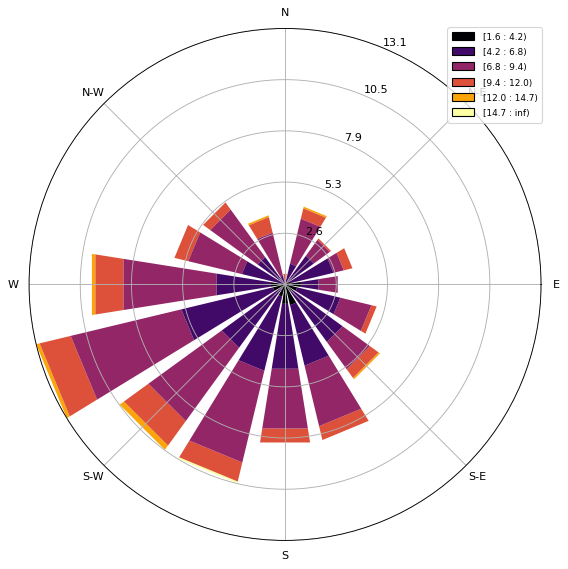

In [18]:
from windrose import WindroseAxes
from matplotlib import cm

ax = WindroseAxes.from_ax()
ax.bar(VV_full['WD50M'],VV_full['WS50M'], normed = True, cmap=cm.inferno)
ax.set_legend(loc = 'upper right')

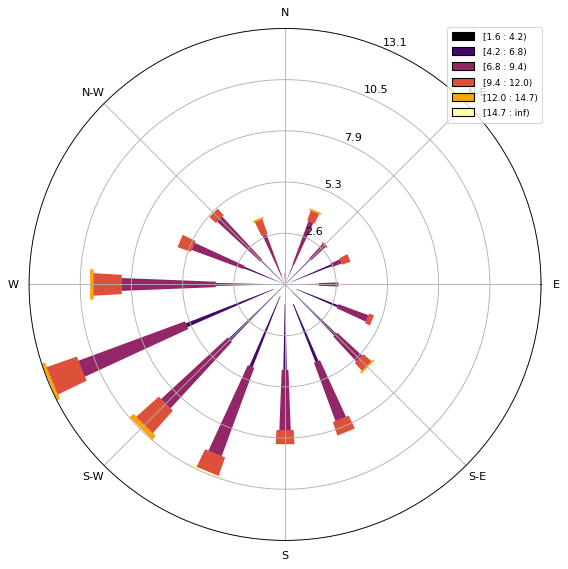

In [19]:
ax = WindroseAxes.from_ax()
ax.box(VV_full['WD50M'],VV_full['WS50M'], normed = True, cmap=cm.inferno)
ax.set_legend(loc = 'upper right')

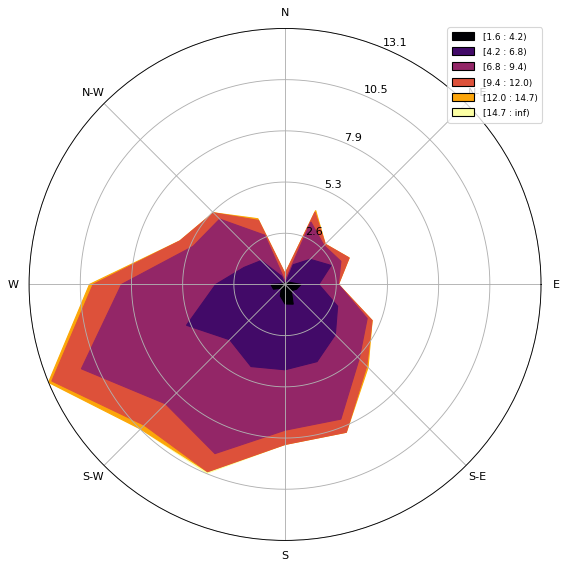

In [20]:
ax = WindroseAxes.from_ax()
ax.contourf(VV_full['WD50M'],VV_full['WS50M'], normed = True, cmap=cm.inferno)
ax.set_legend(loc = 'upper right')

Distribución

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



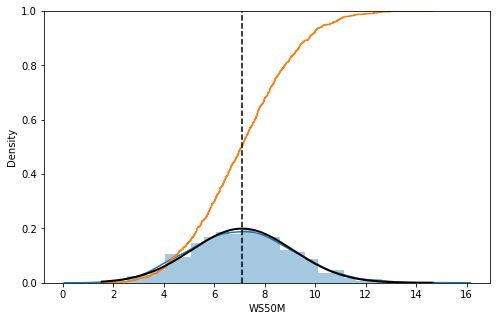

In [21]:
plt.figure(figsize=(8,5))
sns.distplot(VV_full['WS50M'])
sns.ecdfplot(VV_full['WS50M'])
plt.axvline(VV_full['WS50M'].mean(), color = 'black', linestyle = 'dashed')

mu, std = s.norm.fit(VV_full['WS50M'])
x = np.linspace(VV_full['WS50M'].min(), VV_full['WS50M'].max(),VV_full['WS50M'].shape[0])
plt.plot(x, VV_full['frecc'], 'k', linewidth=2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



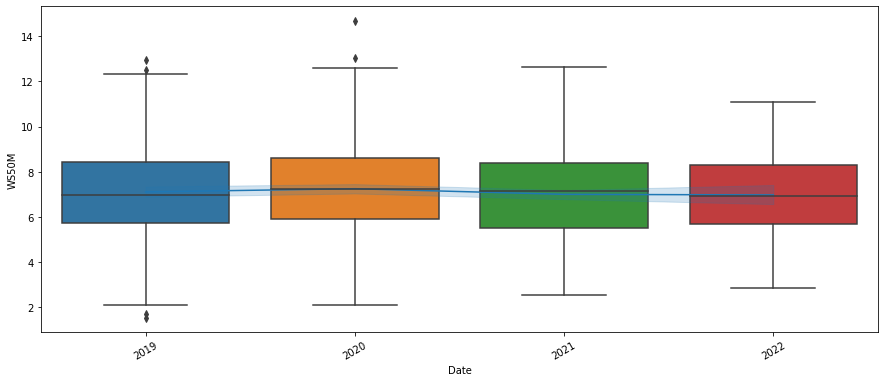

In [23]:
plt.figure(figsize = (15,6))
sns.lineplot(VV_full['Date'].dt.strftime('%Y'), y = VV_full['WS50M'])
sns.boxplot(VV_full['Date'].dt.strftime('%Y'), y = VV_full['WS50M'])
plt.xticks(rotation=30);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



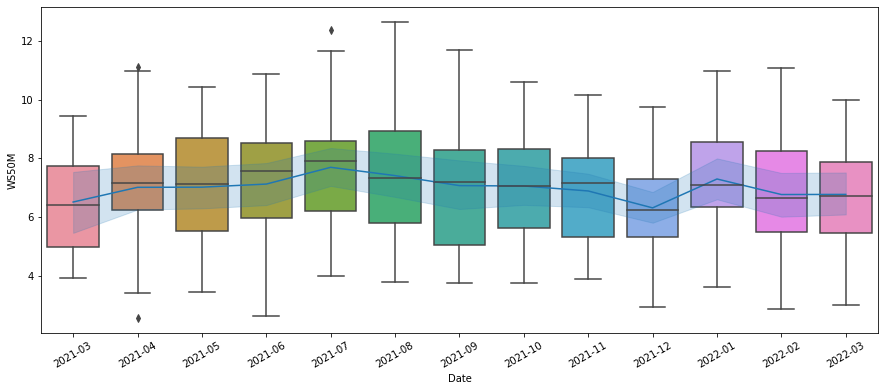

In [24]:
plt.figure(figsize = (15,6))
sns.lineplot(VV_full['Date'].dt.strftime('%Y-%m')[730:], y = VV_full['WS50M'][730:])
sns.boxplot(VV_full['Date'].dt.strftime('%Y-%m')[730:], y = VV_full['WS50M'][730:])
plt.xticks(rotation=30);

### Estimación de la velocidad del viento a 100m

$\nu_{wind} = \nu_{wind,ref}\frac{
  ln\left(\frac{z_{wind}}{z_{0}}\right)}
  {ln\left(\frac{z_{wind,ref}}{z_{0}}\right)} $



In [25]:
z0 = 0.2
z_wind_ref = 50.0
z_wind = 100

In [26]:
VV_full['WS100M'] = VV_full['WS50M']*(np.log(z_wind/z0))/(np.log(z_wind_ref/z0))

In [27]:
VV_full.head(5)

,YEAR,MO,DY,PS,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,QV2M,...,T2M_MAX,T2M_RANGE,TS,T2MWET,T2MDEW,T2M,Date,season,frecc,WS100M
0,2019,3,21,97.96,6.43,8.00,5.23,2.77,170.31,5.86,...,19.05,14.04,12.87,8.98,5.76,12.20,2019-03-21,autumn,0.004197,7.237202
1,2019,3,22,97.45,7.78,9.67,4.61,5.07,342.44,7.32,...,23.53,13.54,16.30,12.31,8.83,15.78,2019-03-22,autumn,0.004267,8.756677
2,2019,3,23,97.12,9.79,11.55,7.63,3.92,284.00,7.81,...,27.21,15.31,17.83,13.64,9.76,17.52,2019-03-23,autumn,0.004338,11.019006
3,2019,3,24,97.78,10.06,13.40,5.70,7.70,192.50,6.16,...,17.88,9.38,12.65,9.25,6.44,12.06,2019-03-24,autumn,0.004411,11.322901
4,2019,3,25,98.18,6.05,7.96,4.80,3.16,140.50,5.13,...,19.25,13.50,12.47,7.63,3.92,11.35,2019-03-25,autumn,0.004484,6.809498


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



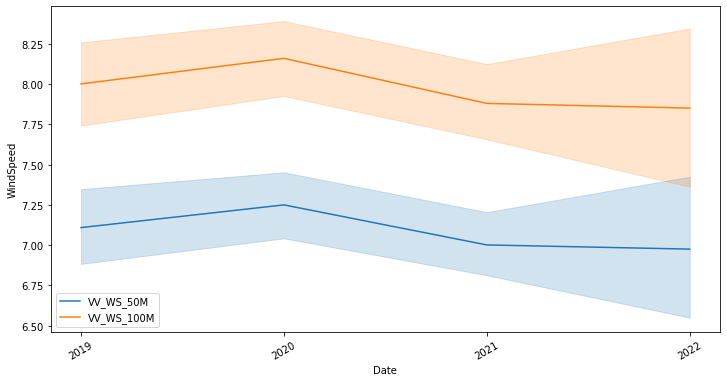

In [32]:
plt.figure(figsize = (12,6))
sns.lineplot(VV_full['Date'].dt.strftime('%Y'), y = VV_full['WS50M'], label = 'VV_WS_50M')
sns.lineplot(VV_full['Date'].dt.strftime('%Y'), y = VV_full['WS100M'], label = 'VV_WS_100M')
plt.ylabel('WindSpeed')
plt.legend(loc = 'lower left')
plt.xticks(rotation=30);

## Bahía San Blas

In [33]:
BSB_df_copy = joined_date(BSB_df_copy)
BSB_full = get_season(BSB_df_copy)
BSB_full = get_norm_frecc(BSB_full)
BSB_full.head(5)

,YEAR,MO,DY,WD50M,WS50M_RANGE,WS50M_MIN,WS50M_MAX,WS50M,PS,PRECTOTCORR,...,T2M_MIN,T2M_MAX,T2M_RANGE,TS,T2MWET,T2MDEW,T2M,Date,season,frecc
0,2019,3,21,193.50,2.89,6.84,9.74,8.28,101.96,0.00,...,15.37,18.19,2.82,18.15,13.94,11.00,16.88,2019-03-21,autumn,0.006009
1,2019,3,22,174.00,5.76,4.94,10.70,7.77,101.38,0.30,...,15.82,19.09,3.28,18.62,15.63,13.40,17.86,2019-03-22,autumn,0.006093
2,2019,3,23,256.38,10.05,6.63,16.69,11.55,100.86,2.37,...,15.26,20.09,4.84,18.49,15.65,13.00,18.32,2019-03-23,autumn,0.006178
3,2019,3,24,178.75,10.62,6.54,17.15,12.52,101.90,1.20,...,13.41,15.23,1.81,17.73,12.45,10.31,14.58,2019-03-24,autumn,0.006264
4,2019,3,25,104.75,2.90,3.59,6.48,4.86,102.49,0.00,...,12.51,14.58,2.08,17.39,11.10,8.66,13.54,2019-03-25,autumn,0.006351


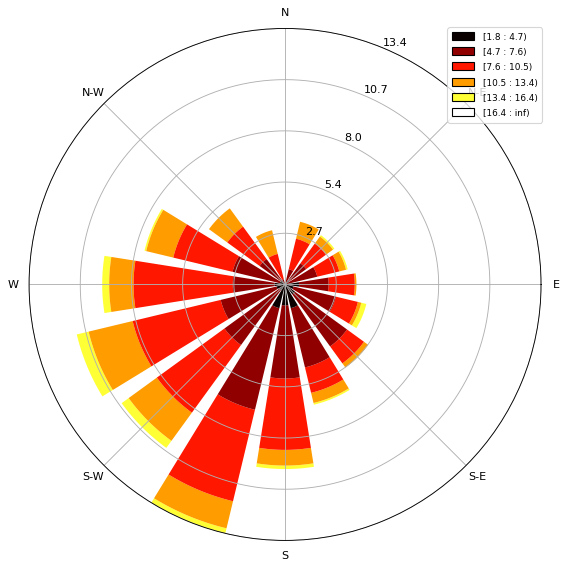

In [34]:
from windrose import WindroseAxes
from matplotlib import cm

ax = WindroseAxes.from_ax()
ax.bar(BSB_full['WD50M'],BSB_full['WS50M'], normed = True, cmap=cm.hot)
ax.set_legend(loc = 'upper right')

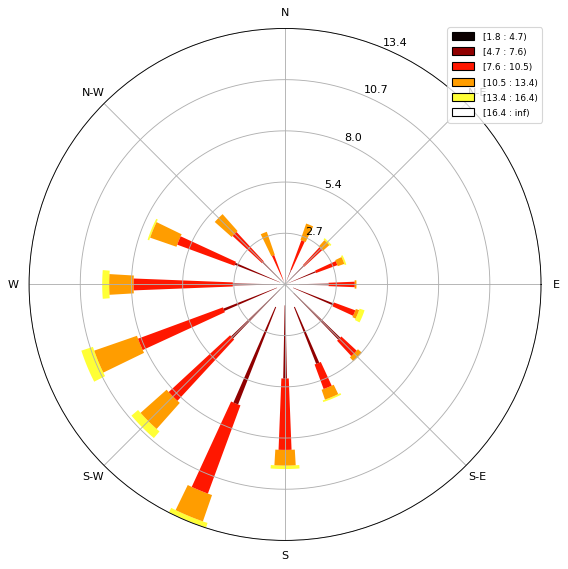

In [35]:
ax = WindroseAxes.from_ax()
ax.box(BSB_full['WD50M'],BSB_full['WS50M'], normed = True, cmap=cm.hot)
ax.set_legend(loc = 'upper right')

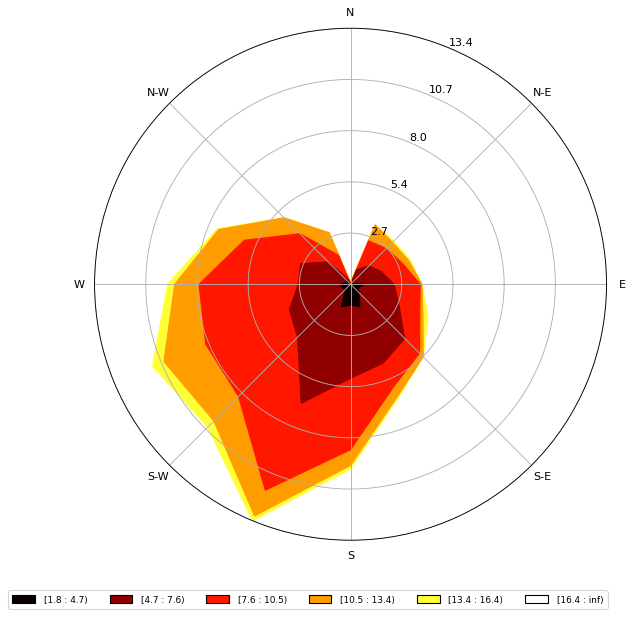

In [36]:
ax = WindroseAxes.from_ax()
ax.contourf(BSB_full['WD50M'],BSB_full['WS50M'], normed = True, cmap=cm.hot)
ax.set_legend(loc = 'upper right', ncol = 6, bbox_to_anchor=(1, -0.1), prop={'size': 10})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



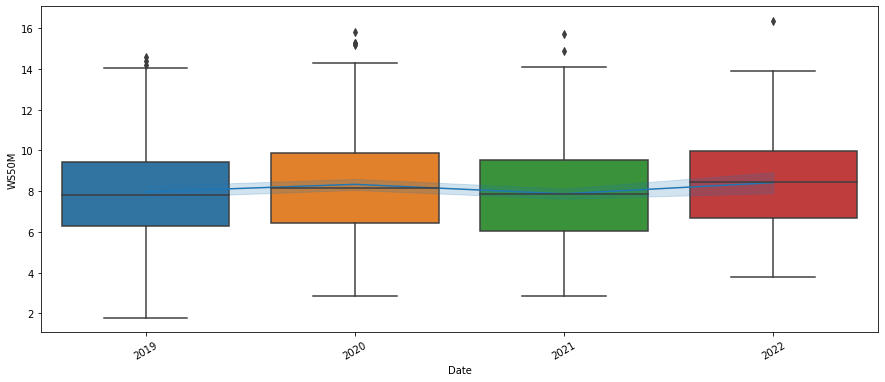

In [37]:
plt.figure(figsize = (15,6))
sns.lineplot(BSB_full['Date'].dt.strftime('%Y'), y = BSB_full['WS50M'])
sns.boxplot(BSB_full['Date'].dt.strftime('%Y'), y = BSB_full['WS50M'])
plt.xticks(rotation=30);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



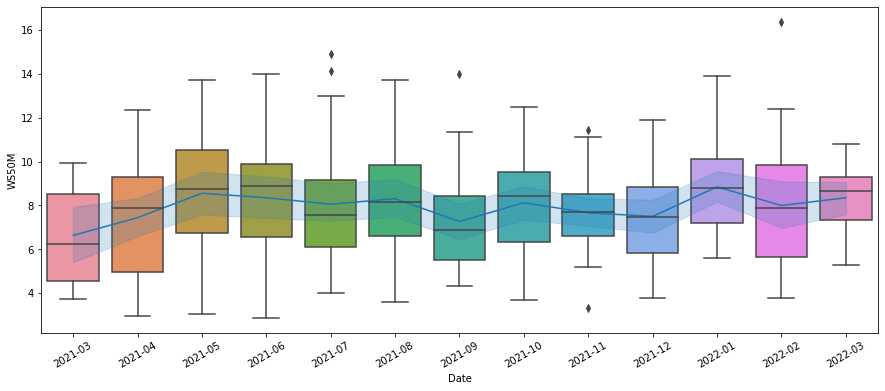

In [61]:
plt.figure(figsize = (15,6))
sns.lineplot(BSB_full['Date'].dt.strftime('%Y-%m')[730:], y = BSB_full['WS50M'][730:])
sns.boxplot(BSB_full['Date'].dt.strftime('%Y-%m')[730:], y = BSB_full['WS50M'][730:])
plt.xticks(rotation=30);

In [38]:
BSB_full['WS100M'] = BSB_full['WS50M']*(np.log(z_wind/z0))/(np.log(z_wind_ref/z0))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



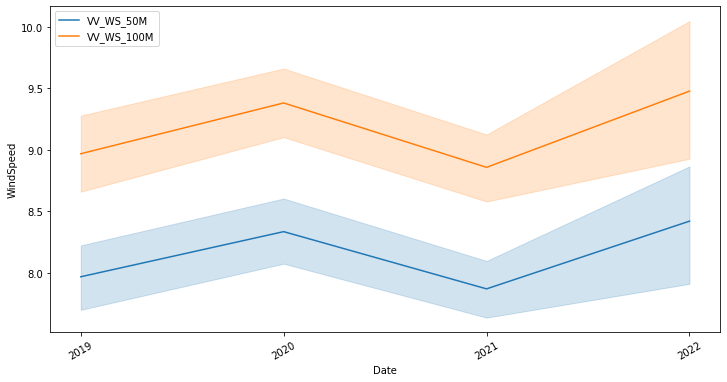

In [40]:
plt.figure(figsize = (12,6))
sns.lineplot(BSB_full['Date'].dt.strftime('%Y'), y = BSB_full['WS50M'], label = 'VV_WS_50M')
sns.lineplot(BSB_full['Date'].dt.strftime('%Y'), y = BSB_full['WS100M'], label = 'VV_WS_100M')
plt.ylabel('WindSpeed')
plt.legend(loc = 'upper left')
plt.xticks(rotation=30);

## San Manuel

In [41]:
SM_df_copy = joined_date(SM_df_copy)
SM_full = get_season(SM_df_copy)
SM_full = get_norm_frecc(SM_full)
SM_full.head(5)

,YEAR,MO,DY,WD50M,WS50M_RANGE,WS50M_MIN,WS50M_MAX,WS50M,PS,PRECTOTCORR,...,T2M_MIN,T2M_MAX,T2M_RANGE,TS,T2MWET,T2MDEW,T2M,Date,season,frecc
0,2019,3,21,100.62,6.62,0.46,7.08,3.10,100.30,0.00,...,7.08,19.49,12.41,13.50,10.08,7.52,12.62,2019-03-21,autumn,0.007999
1,2019,3,22,300.06,3.73,4.23,7.98,6.20,99.98,0.00,...,8.52,20.39,11.87,14.27,11.50,9.01,13.99,2019-03-22,autumn,0.008116
2,2019,3,23,317.19,5.45,6.43,11.88,9.20,99.40,9.53,...,11.09,24.69,13.61,17.31,14.60,11.89,17.30,2019-03-23,autumn,0.008235
3,2019,3,24,217.31,7.47,8.17,15.63,12.14,99.56,1.25,...,10.30,15.50,5.20,12.51,11.05,9.48,12.61,2019-03-24,autumn,0.008355
4,2019,3,25,161.81,4.20,6.24,10.43,8.16,100.26,0.01,...,9.22,17.47,8.25,12.69,9.47,6.69,12.24,2019-03-25,autumn,0.008476


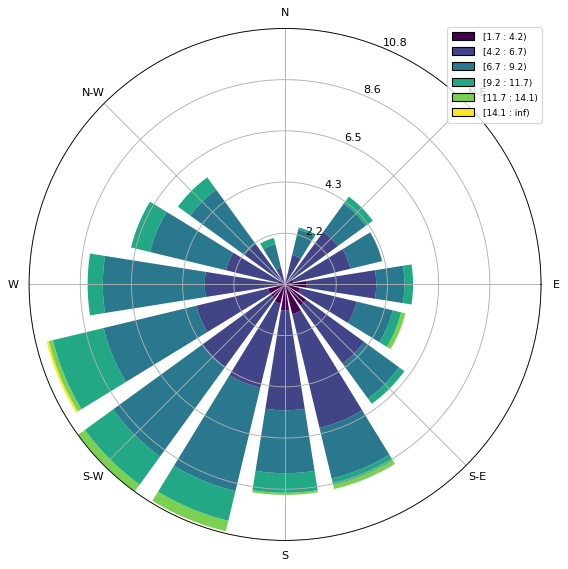

In [44]:
ax = WindroseAxes.from_ax()
ax.bar(SM_full['WD50M'],SM_full['WS50M'], normed = True, cmap=cm.viridis)
ax.set_legend(loc = 'upper right')

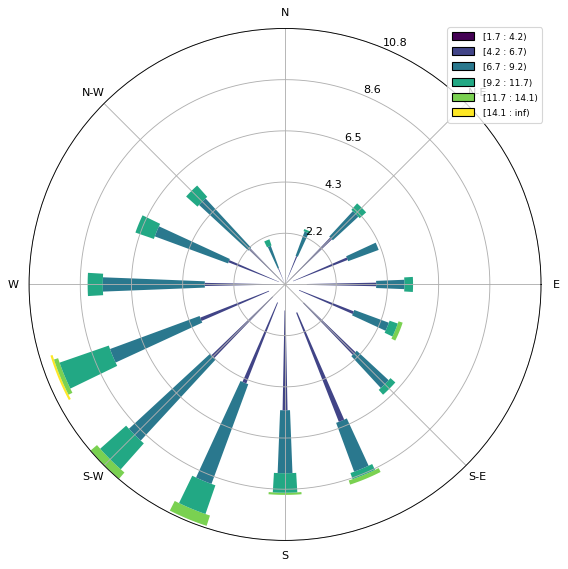

In [45]:
ax = WindroseAxes.from_ax()
ax.box(SM_full['WD50M'],SM_full['WS50M'], normed = True, cmap=cm.viridis)
ax.set_legend(loc = 'upper right')

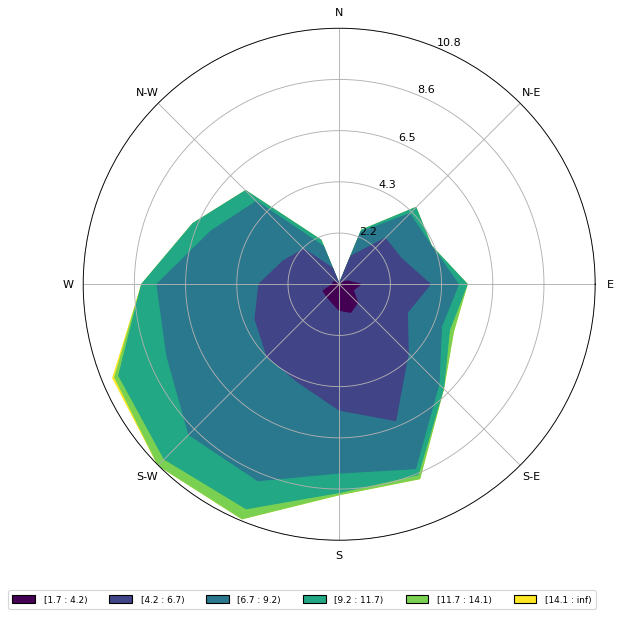

In [42]:
ax = WindroseAxes.from_ax()
ax.contourf(SM_full['WD50M'],SM_full['WS50M'], normed = True, cmap=cm.viridis)
ax.set_legend(loc = 'upper right', ncol = 6, bbox_to_anchor=(1, -0.1), prop={'size': 10})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



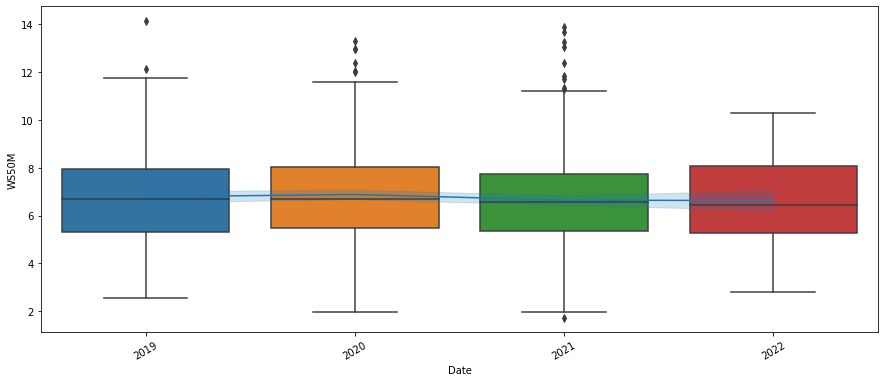

In [46]:
plt.figure(figsize = (15,6))
sns.lineplot(SM_full['Date'].dt.strftime('%Y'), y = SM_full['WS50M'])
sns.boxplot(SM_full['Date'].dt.strftime('%Y'), y = SM_full['WS50M'])
plt.xticks(rotation=30);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



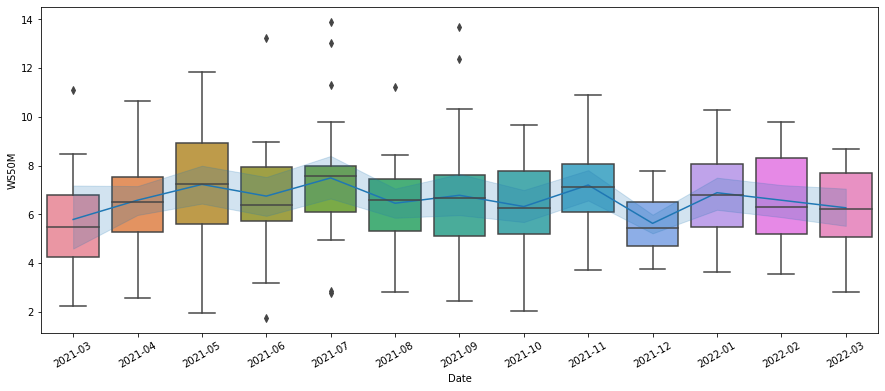

In [62]:
plt.figure(figsize = (15,6))
sns.lineplot(SM_full['Date'].dt.strftime('%Y-%m')[730:], y = SM_full['WS50M'][730:])
sns.boxplot(SM_full['Date'].dt.strftime('%Y-%m')[730:], y = SM_full['WS50M'][730:])
plt.xticks(rotation=30);

In [48]:
SM_full['WS100M'] = SM_full['WS50M']*(np.log(z_wind/z0))/(np.log(z_wind_ref/z0))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



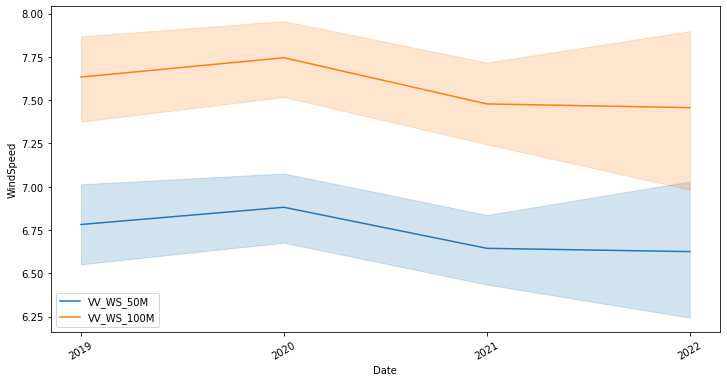

In [49]:
plt.figure(figsize = (12,6))
sns.lineplot(SM_full['Date'].dt.strftime('%Y'), y = SM_full['WS50M'], label = 'VV_WS_50M')
sns.lineplot(SM_full['Date'].dt.strftime('%Y'), y = SM_full['WS100M'], label = 'VV_WS_100M')
plt.ylabel('WindSpeed')
plt.legend(loc = 'lower left')
plt.xticks(rotation=30);

## General Rondeau

In [69]:
GR_df_copy = joined_date(GR_df_copy)
GR_full = get_season(GR_df_copy)
GR_full = get_norm_frecc(GR_full)
GR_full.head(5)

,YEAR,MO,DY,WD50M,WS50M_RANGE,WS50M_MIN,WS50M_MAX,WS50M,PS,PRECTOTCORR,...,T2M_MIN,T2M_MAX,T2M_RANGE,TS,T2MWET,T2MDEW,T2M,Date,season,frecc
0,2019,3,21,140.50,2.64,6.58,9.22,8.25,100.87,0.77,...,8.48,21.57,13.09,15.54,10.21,5.44,14.98,2019-03-21,autumn,0.007326
1,2019,3,22,278.81,10.55,0.75,11.30,5.96,100.28,8.37,...,10.76,27.31,16.55,18.64,13.54,8.36,18.71,2019-03-22,autumn,0.007427
2,2019,3,23,268.19,3.26,7.76,11.02,9.38,100.04,0.31,...,13.63,29.18,15.55,19.89,13.58,7.46,19.72,2019-03-23,autumn,0.007529
3,2019,3,24,176.44,5.33,5.15,10.47,8.27,100.97,0.66,...,10.51,21.83,11.32,16.16,11.06,6.91,15.22,2019-03-24,autumn,0.007632
4,2019,3,25,123.25,4.79,3.34,8.13,4.93,101.32,0.00,...,7.52,20.86,13.34,14.59,9.23,5.30,13.16,2019-03-25,autumn,0.007736


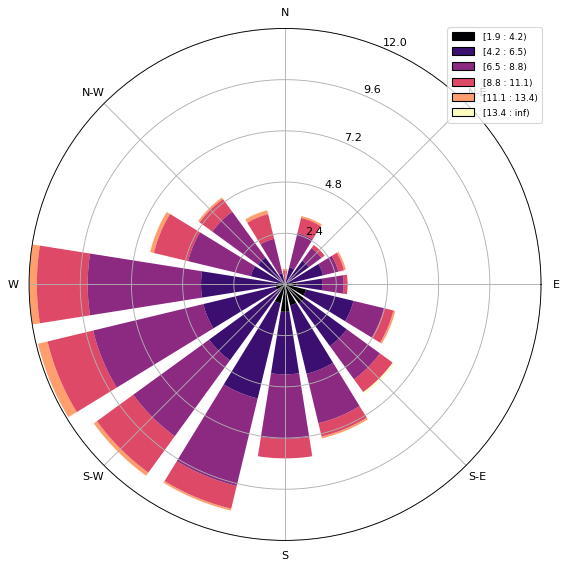

In [70]:
ax = WindroseAxes.from_ax()
ax.bar(GR_full['WD50M'],GR_full['WS50M'], normed = True, cmap=cm.magma)
ax.set_legend(loc = 'upper right')

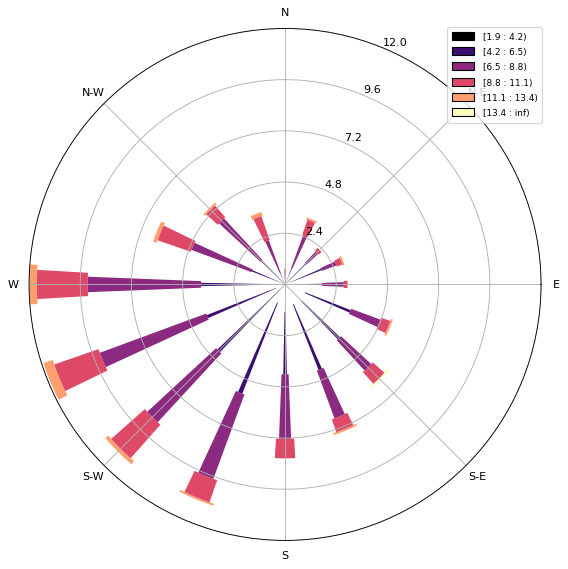

In [71]:
ax = WindroseAxes.from_ax()
ax.box(GR_full['WD50M'],GR_full['WS50M'], normed = True, cmap=cm.magma)
ax.set_legend(loc = 'upper right')

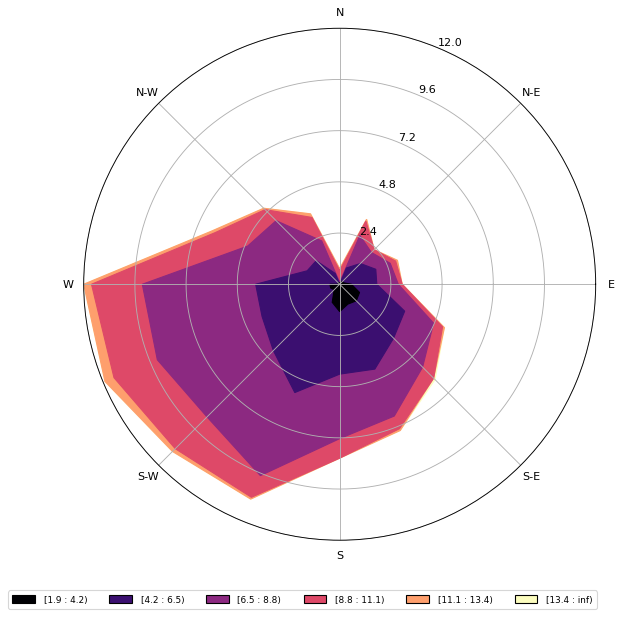

In [72]:
ax = WindroseAxes.from_ax()
ax.contourf(GR_full['WD50M'],GR_full['WS50M'], normed = True, cmap=cm.magma)
ax.set_legend(loc = 'upper right', ncol = 6, bbox_to_anchor=(1, -0.1), prop={'size': 10})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



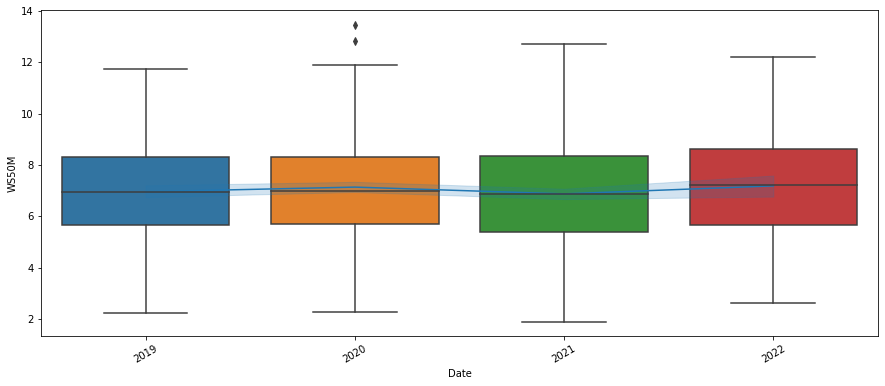

In [73]:
plt.figure(figsize = (15,6))
sns.lineplot(GR_full['Date'].dt.strftime('%Y'), y = GR_full['WS50M'])
sns.boxplot(GR_full['Date'].dt.strftime('%Y'), y = GR_full['WS50M'])
plt.xticks(rotation=30);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



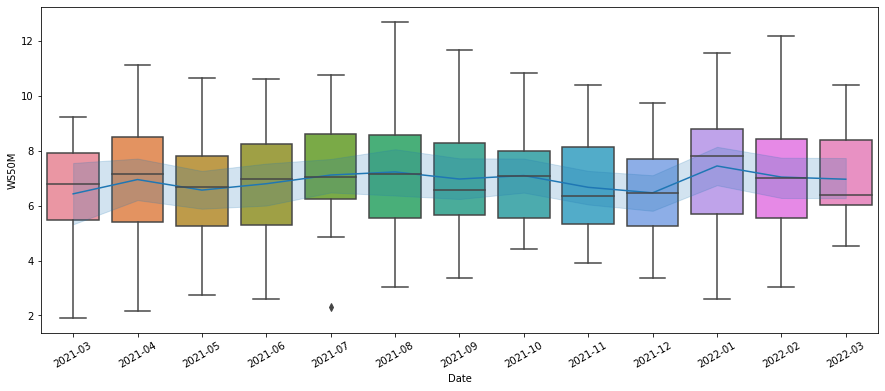

In [74]:
plt.figure(figsize = (15,6))
sns.lineplot(GR_full['Date'].dt.strftime('%Y-%m')[730:], y = GR_full['WS50M'][730:])
sns.boxplot(GR_full['Date'].dt.strftime('%Y-%m')[730:], y = GR_full['WS50M'][730:])
plt.xticks(rotation=30);

In [75]:
GR_full['WS100M'] = GR_full['WS50M']*(np.log(z_wind/z0))/(np.log(z_wind_ref/z0))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



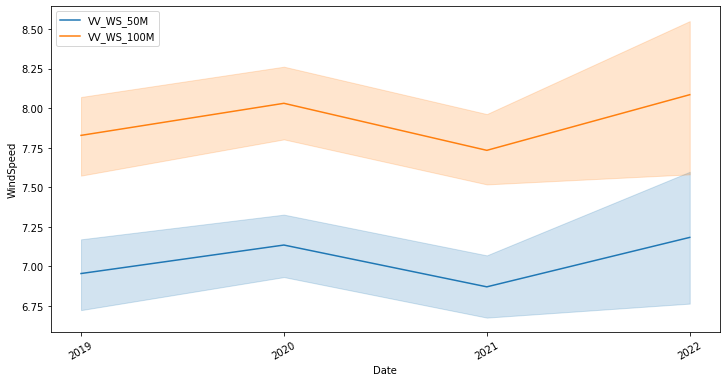

In [77]:
plt.figure(figsize = (12,6))
sns.lineplot(GR_full['Date'].dt.strftime('%Y'), y = GR_full['WS50M'], label = 'VV_WS_50M')
sns.lineplot(GR_full['Date'].dt.strftime('%Y'), y = GR_full['WS100M'], label = 'VV_WS_100M')
plt.ylabel('WindSpeed')
plt.legend(loc = 'upper left')
plt.xticks(rotation=30);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

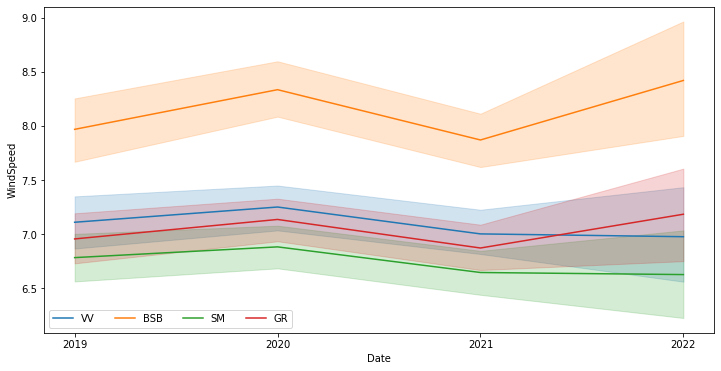

In [78]:
plt.figure(figsize = (12,6))
sns.lineplot(VV_full['Date'].dt.strftime('%Y'), y = VV_full['WS50M'], label = 'VV')
sns.lineplot(BSB_full['Date'].dt.strftime('%Y'), y = BSB_full['WS50M'], label = 'BSB')
sns.lineplot(SM_full['Date'].dt.strftime('%Y'), y = SM_full['WS50M'], label = 'SM')
sns.lineplot(GR_full['Date'].dt.strftime('%Y'), y = GR_full['WS50M'], label = 'GR')
plt.ylabel('WindSpeed')
plt.legend(loc = 'lower left', ncol = 4)

In [79]:
localidades = [['Villa Ventana', -38.065392, -62.006836,VV_full['WS50M'].mean(),VV_full['WS100M'].mean()],
               ['San Manuel',-37.72728, -59.029541,SM_full['WS50M'].mean(),SM_full['WS100M'].mean()],
               ['Bahía San Blas', -40.602745, -62.176437,BSB_full['WS50M'].mean(),BSB_full['WS100M'].mean()],
               ['General Rondeau', -38.272689, -63.105469,GR_full['WS50M'].mean(),GR_full['WS100M'].mean()]]
df_localidades = pd.DataFrame(data = localidades, columns = ['loc', 'lat', 'lon', 'WA50M_mean','WA100M_mean'], index = [0,1,2,3])
df_localidades

,loc,lat,lon,WA50M_mean,WA100M_mean
0,Villa Ventana,-38.065392,-62.006836,7.110356,8.002968
1,San Manuel,-37.727280,-59.029541,6.757710,7.606052
2,Bahía San Blas,-40.602745,-62.176437,8.090675,9.106354
3,General Rondeau,-38.272689,-63.105469,7.003266,7.882435


In [80]:
fig = px.scatter_mapbox(df_localidades, lat="lat", lon="lon", hover_name="loc", color_discrete_sequence=["fuchsia"], zoom=3, 
                        height=550, width = 700, color = 'WA100M_mean',size = 'WA100M_mean')
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()